Import libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [17]:
df=pd.read_csv('data/dpc-covid19-ita-andamento-nazionale.csv',
parse_dates=True,
index_col='data')

In [54]:
df

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,ingressi_terapia_intensiva,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
data,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,101,26,127,94,221,0,221,1,7,229,4324,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-25 18:00:00,114,35,150,162,311,90,93,1,10,322,8623,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-26 18:00:00,128,36,164,221,385,74,78,3,12,400,9587,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-27 18:00:00,248,56,304,284,588,203,250,45,17,650,12014,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-28 18:00:00,345,64,409,412,821,233,238,46,21,888,15695,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-27 17:00:00,7865,274,8139,489914,498053,-194,23956,23672245,181322,24351620,257593104,65956542.0,39.0,9554305.0,14797315.0,98786040.0,158807064.0
2022-11-28 17:00:00,8040,283,8323,481655,489978,-8075,12266,23692505,181403,24363886,257670989,65971834.0,29.0,9555593.0,14808293.0,98800734.0,158870255.0
2022-11-29 17:00:00,8179,289,8468,492208,500676,10698,50626,23732286,181544,24414506,257958950,66016484.0,41.0,9563512.0,14850994.0,98840305.0,159118645.0


In [18]:
df.columns

Index(['stato', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido'],
      dtype='object')

In [19]:
df.shape

(1012, 23)

In [20]:
df.isnull().sum()

stato                                        0
ricoverati_con_sintomi                       0
terapia_intensiva                            0
totale_ospedalizzati                         0
isolamento_domiciliare                       0
totale_positivi                              0
variazione_totale_positivi                   0
nuovi_positivi                               0
dimessi_guariti                              0
deceduti                                     0
casi_da_sospetto_diagnostico               850
casi_da_screening                          850
totale_casi                                  0
tamponi                                      0
casi_testati                                55
note                                       968
ingressi_terapia_intensiva                 283
note_test                                 1012
note_casi                                 1012
totale_positivi_test_molecolare            326
totale_positivi_test_antigenico_rapido     326
tamponi_test_

Data cleaning

In [21]:
df=df.drop(columns=['stato','note','note_test','note_casi','casi_da_sospetto_diagnostico','casi_da_screening'])

Fill Nan values with 0

In [22]:
df=df.fillna(0)

In [24]:
df.columns

Index(['ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati',
       'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'totale_casi', 'tamponi', 'casi_testati',
       'ingressi_terapia_intensiva', 'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido'],
      dtype='object')

Plot

In [35]:
sns.set()

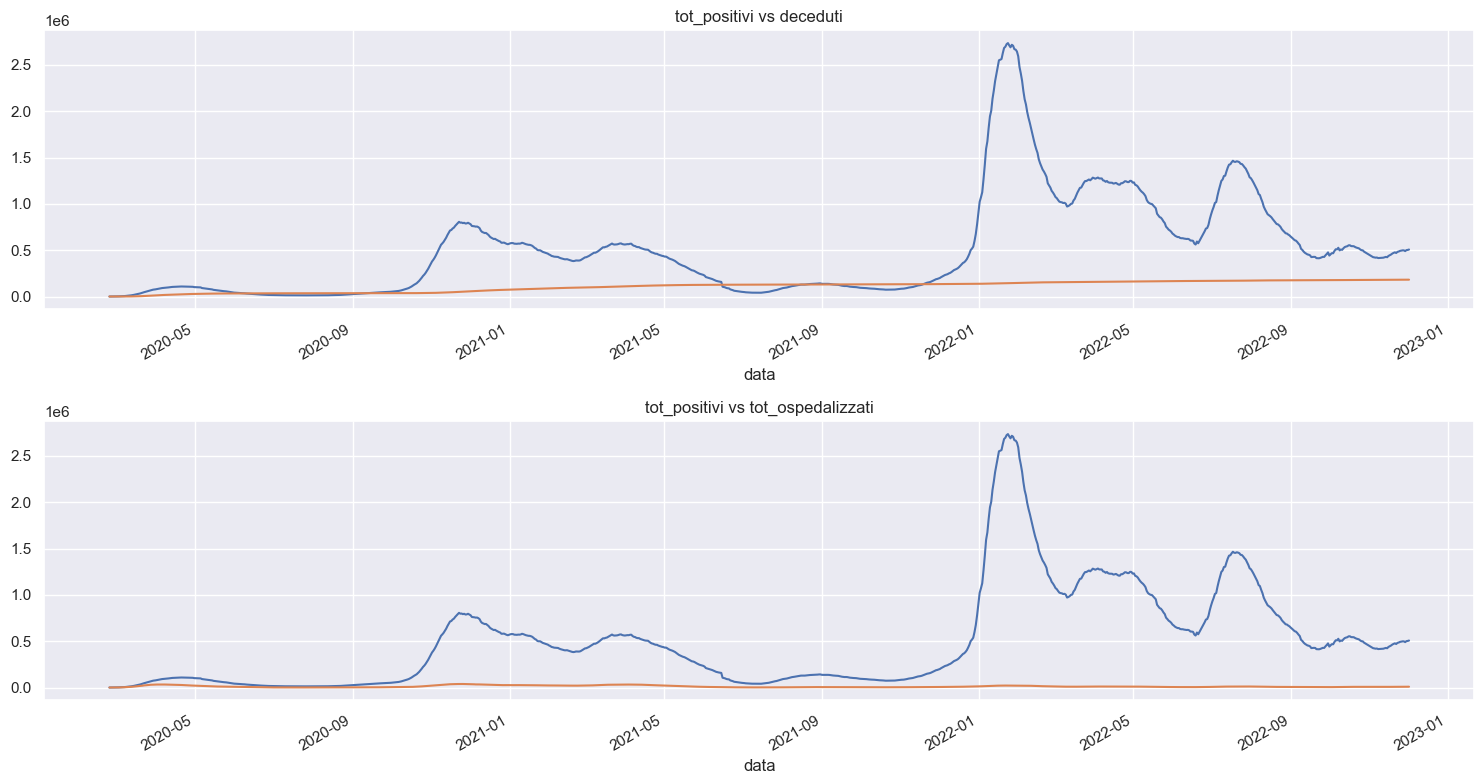

In [48]:
plt.figure(figsize=(15,8))
plt.subplot(211)
df['totale_positivi'].plot()
df['deceduti'].plot()
plt.title('tot_positivi vs deceduti')

plt.subplot(212)
df['totale_positivi'].plot()
df['totale_ospedalizzati'].plot()
plt.title('tot_positivi vs tot_ospedalizzati')

plt.tight_layout()

<AxesSubplot: title={'center': 'nuovi positivi'}, xlabel='data'>

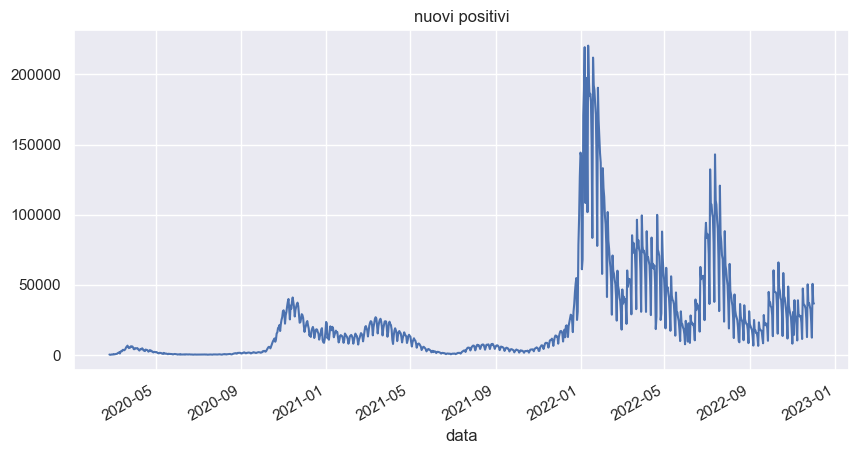

In [52]:
df['nuovi_positivi'].plot(figsize=(10,5),title='nuovi positivi')

In [62]:
df['perc_positivi_tamponi']=round(df.totale_positivi/df.tamponi,4)

<AxesSubplot: title={'center': 'perc. positivi/tamponi'}, xlabel='data'>

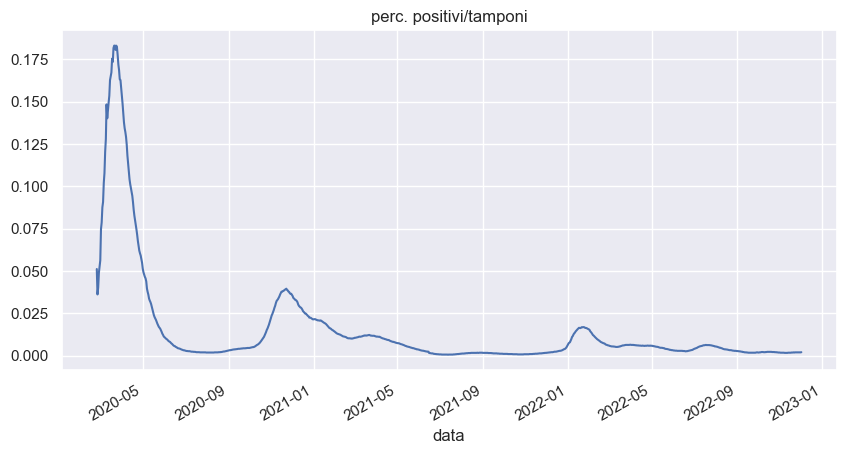

In [65]:
df['perc_positivi_tamponi'].plot(figsize=(10,5),
title='perc. positivi/tamponi')